# Testing the Classifier 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import cv2 as cv
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Import the test data
df_test = pd.read_pickle("./pickled_data/df_test.pkl")
df_test

,img_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
...,...,...
495,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
496,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
497,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
498,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [3]:
model_a = joblib.load("./exported_models/svm_model_(a).pkl")

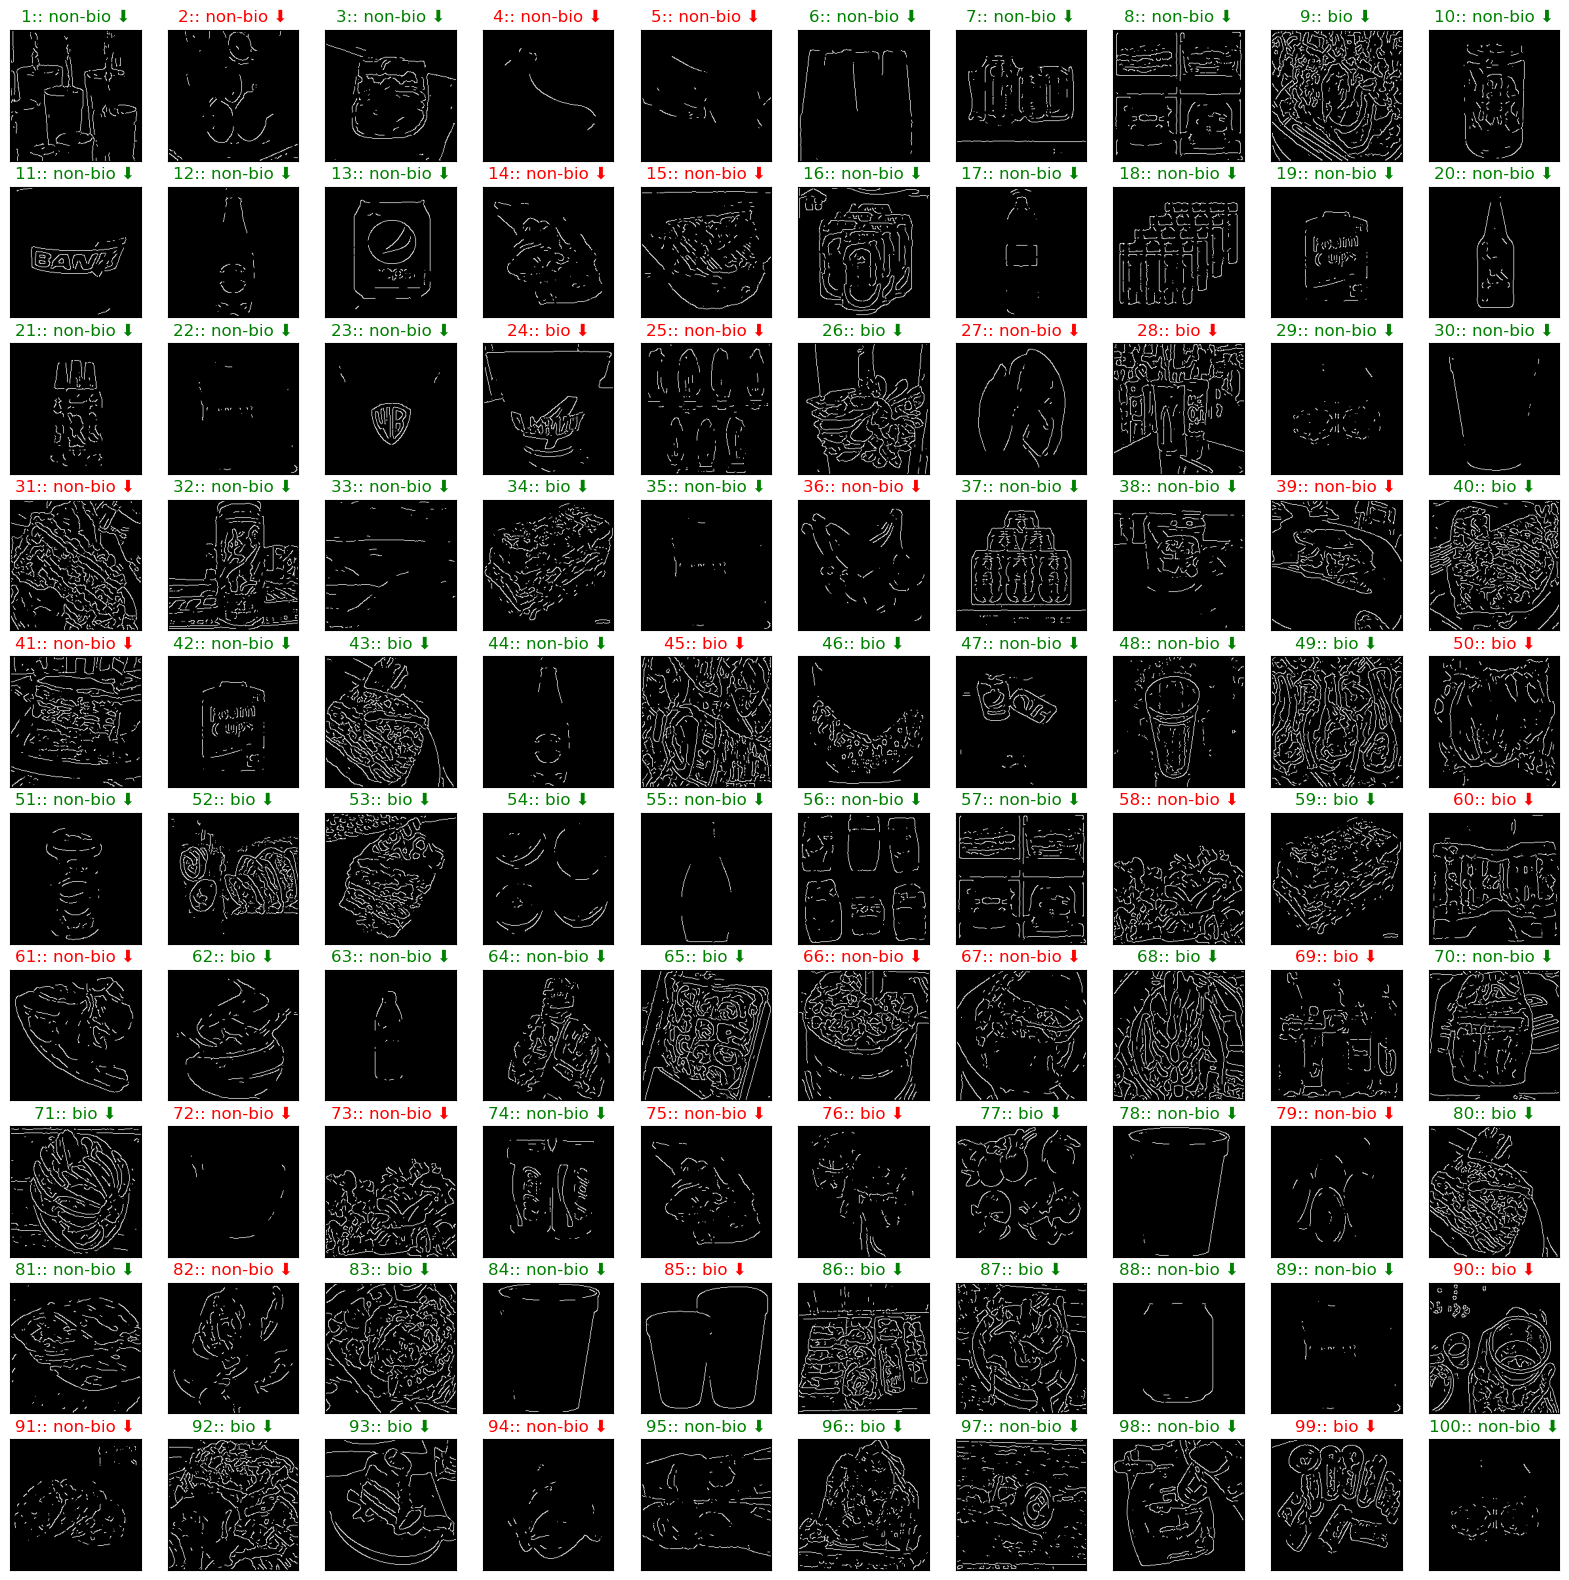

In [4]:
random_nums = np.random.randint(0, len(df_test), 100)
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(df_test.iloc[random_nums[i], 0], cmap="gray")
    axi.set(xticks=[], yticks=[])
    title = ""
    actual = df_test.iloc[random_nums[i], 1]
    prediction = model_a.predict(df_test.iloc[random_nums[i], 0].reshape(1, -1))
    # Set title to Normal if the prediction is 0
    if prediction == 0:
        title = "bio"
    else:
        title = "non-bio"
    # Set the title to be red if the prediction is wrong
    if prediction != actual:
        axi.set_title(f"{i+1}:: {title} ⬇️", color="red")
    else:
        # Set the title to be green if the prediction is correct
        axi.set_title(f"{i+1}:: {title} ⬇️", color="green")
plt.show()